<a href="https://colab.research.google.com/github/ChrysMan/Reinforccement-Learning-TUC-2024/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

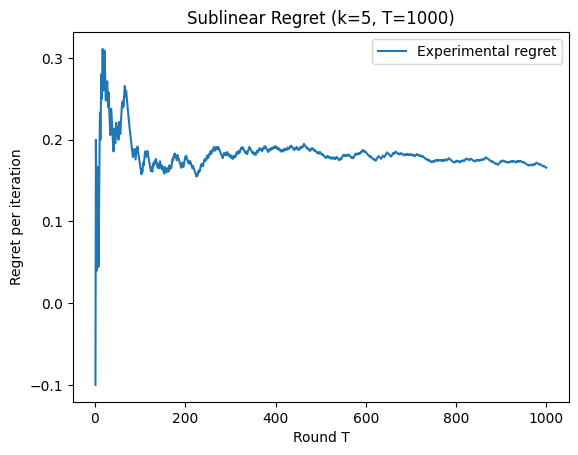

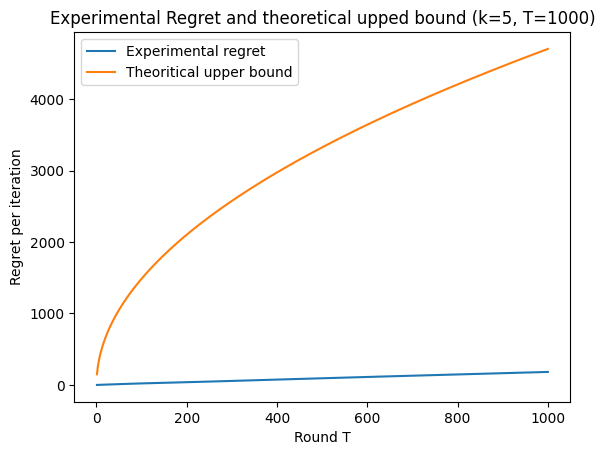

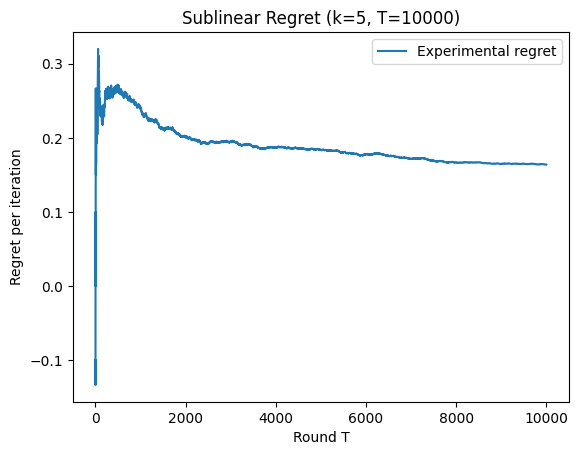

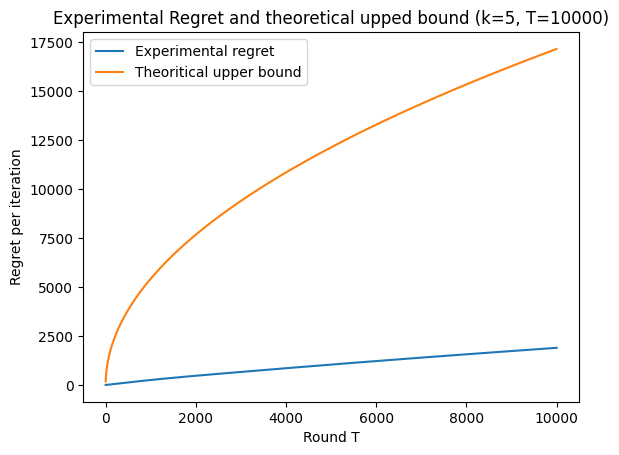

In [15]:
# Environment
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

k = 5       # number of arms (news articles)
T_values = [1000, 10000]    # horizon

# Number of user types
user_type_num = 4 # female over 25, female under 25, male over 25, male under 25
# The click probabilities for articles (arms) for every type of user
bandit = np.array([[0.8, 0.6, 0.5, 0.4, 0.2],[0.2, 0.4, 0.5, 0.6, 0.8],[0.2, 0.4, 0.8, 0.6, 0.5],[0.2, 0.4, 0.8, 0.6, 0.5]])

best =  np.max(bandit, axis=1) # Best arm
#print(best[0])
#print('best arm for every type of user:', np.argmax(bandit, axis=1))


for T in T_values:
  # Initializations
  bandit_score = np.zeros((k,))                      # total score of each arm for first N rounds
  exploration_counts = np.zeros((k, user_type_num))  # exploration counts for each arm and user type
  estimate_score = np.zeros((k, user_type_num))      # average reward of arm i up to round t
  alg_score = np.zeros((T+1,))                       # cumulative reward for round t
  best_score = np.zeros((T+1,))                      # cumulative reward of best arm for round t
  ucb = np.zeros((k, user_type_num))                 # UCB value of each arm
  regret =  np.zeros((T+1,))                         # regret for round t
  theoritical_upper_bound = np.zeros((T+1,))         # upper bound for the theoretical expected regret of the algorithm
  cumulative_regret = np.zeros((T+1,))               # experimental regret

  # Algorithm
  for t in range(1, T+1):
    # Choose with equal probability (25%) one of four types of users (0, 1, 2, 3)
    user = np.random.randint(0, user_type_num)

    # Choose each arm once to initialize
    if t-1 < k:
      arm = t-1;
    else:
      for i in range(k):
         # If this arm of this user isn't pulled yet then set it to infinity so it will be pulled
        if(exploration_counts[i, user] == 0):
            ucb[i][user] = np.inf
        else:
          estimate_score[i][user] = bandit_score[i]/exploration_counts[i, user]    # Computing average reward of arm i for selected user
          ucb[i][user] = estimate_score[i][user] + np.sqrt(2*np.log(T)/exploration_counts[i, user])  # Computing UCB of arm i for selected user
      arm = np.argmax(ucb[:, user])  # Choose the arm with the highest UCB value

    inst_score = np.random.binomial(1,p=bandit[user][arm]) # Score of arm with the highest UCB value for selected user
    # Incrementing
    exploration_counts[arm, user] += 1
    bandit_score[arm] += inst_score

    # Update cumulative rewards and regret
    if t > 1: # for round greater than 0
      best_score[t] = best_score[t-1] + best[user]
      alg_score[t] = alg_score[t-1] + inst_score
    else: # for first round
      best_score[t] = best[user]
      alg_score[t] = inst_score

    regret[t] = (best_score[t] - alg_score[t]) / (t+1)

    theoritical_upper_bound[t] = 40*np.sqrt(2*t*np.log(T))

    if t > 1: # for round greater than 0
      cumulative_regret[t] = cumulative_regret[t-1] + regret[t]
    else: # for first round
      cumulative_regret[t] = regret[t]

  # Plot results
  plt.plot(np.arange(1, T+1), regret[1:T+1], label = 'Experimental regret')
  plt.title(f"Sublinear Regret (k=5, T={T})")
  plt.xlabel('Round T')
  plt.ylabel('Regret per iteration')
  plt.legend()
  plt.show()

  plt.plot(np.arange(1, T+1), cumulative_regret[1:T+1], label = 'Experimental regret')
  plt.plot(np.arange(1, T+1), theoritical_upper_bound[1:T+1], label = 'Theoritical upper bound')
  plt.title(f"Experimental Regret and theoretical upped bound (k=5, T={T})")
  plt.xlabel('Round T')
  plt.ylabel('Regret per iteration')
  plt.legend()
  plt.show()

